In [1]:
import qiskit.tools.jupyter
%qiskit_version_table

In [2]:
from qiskit import IBMQ, QuantumCircuit, transpile
from qiskit.tools import job_monitor
from qiskit.visualization import plot_histogram, plot_gate_map

#### Save your API token for the first time (you only have to do it once)
Uncomment the first line and run the cell below if this is your first time:

In [3]:
# IBMQ.save_account("0123456789")  # Your actual API token here.
# Delete the token from this cell after running this cell
print("The token is saved to disk now, comment out the first line.")

The token is saved to disk now, comment out the first line.


In [4]:
# Loading your IBM Quantum account(s)
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend('ibmq_santiago')

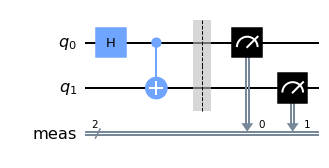

In [5]:
# Generate a Bell state
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()
qc.draw(output='mpl')

In [6]:
import qiskit.tools.jupyter
%qiskit_job_watcher 

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [ ]:
# run job on real hardware
job = backend.run(transpile(qc, backend=backend), shots=1024)
print(job.job_id())

In [7]:
# or retrieve previously-run job
job = backend.retrieve_job('62790a068e10625448782097') # your job id here

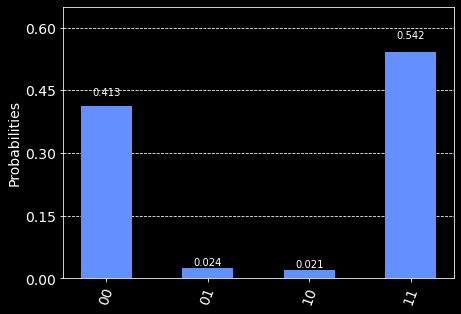

In [8]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plot_histogram(job.result().get_counts())